In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("heart.csv")


In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data_dup = data.duplicated().any()

In [6]:
data_dup

np.True_

In [7]:
data = data.drop_duplicates()

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

np.False_

In [10]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([0, 1, 2, 3])

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [18]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [19]:
x = data.drop('target',axis=1)

In [20]:
y= data['target']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()

In [26]:
log.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_pred1 = log.predict(x_test)

10. Checking prediction

In [28]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [29]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

11.SVC (Support Vector Classifier)

In [30]:
from sklearn import svm

In [31]:
svm =  svm.SVC()

In [32]:
svm.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
y_pred2 = svm.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

12. KNeighbors Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
y_pred3= knn.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [40]:

score = []
for k in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [41]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [42]:

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [43]:
data = pd.read_csv('heart.csv')

In [44]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [45]:
data = data.drop_duplicates()

In [46]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [47]:
data.shape

(302, 14)

In [48]:
x = data.drop('target',axis=1)
y=data['target']


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [53]:
y_pred4=dt.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
y_pred5 = rf.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbc = GradientBoostingClassifier()

In [62]:
gbc.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [63]:
y_pred6 = gbc.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [65]:
import pandas as pd
from sklearn.metrics import accuracy_score


final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
    'ACC': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6)
    ]
})


print(final_data)


  Models       ACC
0     LR  0.786885
1    SVM  0.803279
2    KNN  0.737705
3     DT  0.704918
4     RF  0.868852
5     GB  0.803279


In [66]:
import seaborn as sns

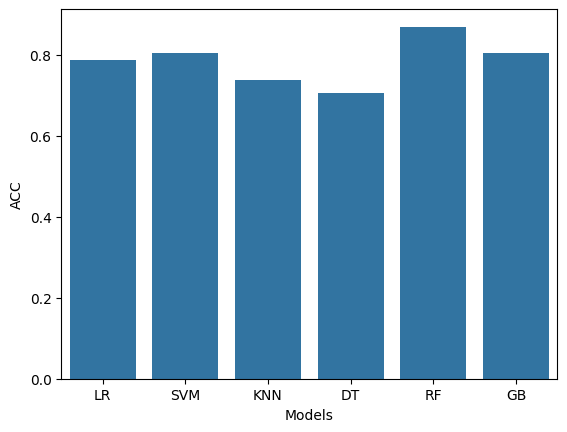

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Models', y='ACC', data=final_data)
plt.show()


In [68]:

print(data['target'].value_counts())  


target
1    164
0    138
Name: count, dtype: int64


In [69]:
x.shape

(302, 13)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier()
rf.fit(x,y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
import pandas as pd

In [73]:
import pandas as pd

new_data = pd.DataFrame({
    'age': 52,
    'sex': 1,  
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg': 1,
    'thalach': 168,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 2,
    'thal': 3
}, index=[0])


In [74]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [75]:
rf.predict(new_data)

array([0])

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test) 
rf.fit(x_train_scaled, y_train)  


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
new_data = new_data[x_train.columns]
new_data_scaled = scaler.transform(new_data) 
p = rf.predict(new_data_scaled)
if p [0] == 1: 
    print("Disease")
else:
    print("No Disease")


No Disease


In [78]:
import joblib

In [79]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [80]:
model = joblib.load('model_joblib_heart')

In [81]:
model.predict(new_data)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0])

In [82]:
import joblib
import tkinter as tk
from tkinter import Label, Entry, Button
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

x = data.drop('target', axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

joblib.dump(model, 'model_joblib_heart')  



['model_joblib_heart']

In [83]:


def show_entry_fields():
    try:
        p1 = int(e1.get())
        p2 = int(e2.get())
        p3 = int(e3.get())
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = int(e8.get())
        p9 = int(e9.get())
        p10 = float(e10.get())
        p11 = int(e11.get())
        p12 = int(e12.get())
        p13 = int(e13.get())
        
        model = joblib.load('model_joblib_heart')
        result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

        if result[0] == 0:
            output_label.config(text="Possibility of Heart Disease", fg="red")
        else:
            output_label.config(text="NO Heart Disease", fg="green")

    except ValueError:
        output_label.config(text="Invalid input! Please enter numeric values.", fg="orange")
master = tk.Tk()
master.title("Heart Disease Prediction System")

tk.Label(master, text="Heart Disease Prediction System", bg="black", fg="white").grid(row=0, columnspan=2)

labels = ["Age", "Sex", "CP", "Trestbps", "Chol", "FBS", "RestECG", "Thalach", "Exang", "Oldpeak", "Slope", "CA", "Thal"]
entries = []

for i, label in enumerate(labels):
    tk.Label(master, text=f"Enter value of {label}").grid(row=i+1, column=0)
    entry = tk.Entry(master)
    entry.grid(row=i+1, column=1)
    entries.append(entry)

(e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13) = entries

Button(master, text='Predict', command=show_entry_fields).grid(row=14, column=1)
output_label = Label(master, text="", fg="blue")
output_label.grid(row=15, columnspan=2)

master.mainloop()
